In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()

In [3]:
# Step1 - Convolution
classifier.add(Convolution2D(64, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

In [4]:
# Step2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [5]:
# Adding a second convolution layer
classifier.add(Convolution2D(64, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [6]:
# step3 - Flattening
classifier.add(Flatten())

In [7]:
# Step4 - Full COnnection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

In [8]:
# Compiling the CNN
classifier.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
training_set = train_datagen.flow_from_directory(
        '/kaggle/input/files1/Malaria Cells/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/kaggle/input/files1/Malaria Cells/testing_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 27558 images belonging to 2 classes.
Found 15832 images belonging to 2 classes.


### Early Stopping

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [13]:
# nb_epochs how much times you want to back propogate
# steps_per_epoch it will transfer that many images at 1 time
# & epochs means 'steps_per_epoch' will repeat that many times
classifier.fit_generator(
        training_set,
        steps_per_epoch=5000,
        nb_epoch=10,
        validation_data=test_set,
        nb_val_samples=1000,
        callbacks=[early_stop])

Epoch 1/10
5000/5000 [==============================] - 396s 79ms/step - loss: 0.0995 - accuracy: 0.9653 - val_loss: 0.0287 - val_accuracy: 0.9701
Epoch 5/10
2474/5000 [=============>................] - ETA: 3:00 - loss: 0.0923 - accuracy: 0.9679

### Evaluating the Model

In [14]:
import pandas as pd
losses = pd.DataFrame(classifier.history.history)

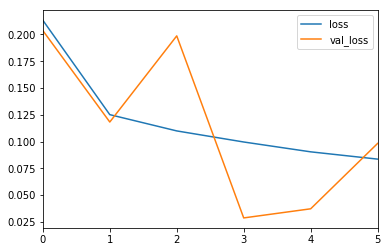

In [15]:
losses[['loss','val_loss']].plot()

In [16]:
classifier.metrics_names

['loss', 'accuracy']

In [17]:
classifier.evaluate_generator(test_set)

[0.06797713786363602, 0.9777665734291077]

In [18]:
from tensorflow.keras.preprocessing import image

In [19]:
import numpy as np

test_image = image.load_img('/kaggle/input/files1/Malaria Cells/single_prediction/Parasitised.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Uninfected'
else:
    prediction = 'Parasitised'
prediction

'Parasitised'